<a href="https://colab.research.google.com/github/waleedbensghaier/toothdetection/blob/main/s20_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2022-10-25 20:27:16--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   195MB/s    in 2.1s    

2022-10-25 20:27:19 (195 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’ saved [430460776/430460776]

(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.0.77-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+cuda11.2) ...
lrwxrwxrwx 1 root root     17 Jan 25  2021 /usr/lib/x86_64-linux-gnu

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2022-10-25 20:58:38--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip.1’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0s      

2022-10-25 20:58:39 (121 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip.1’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
replace maskrcnn_colab/mrcnn_demo/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_colab/mrcnn_demo/model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_colab/mrcnn_demo/m_rcnn.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_colab/mrcnn_demo/parallel_model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace maskrcnn_colab/mrcnn_dem

In [7]:
# Extract Images
images_path = "/content/drive/MyDrive/image.zip"
annotations_path = "/content/drive/MyDrive/annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 133 images


In [8]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/annotations.json
Annotation json path:  /content/drive/MyDrive/annotations.json
Train: 13
Validation: 1
Classes: 1


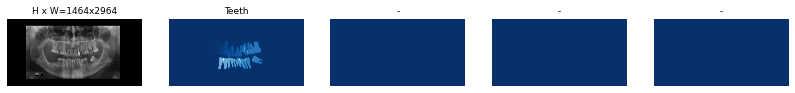

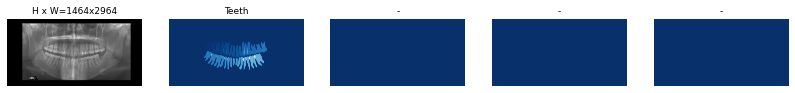

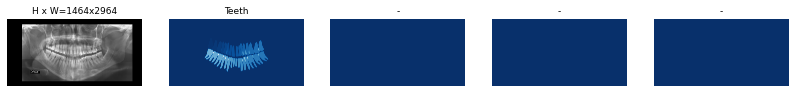

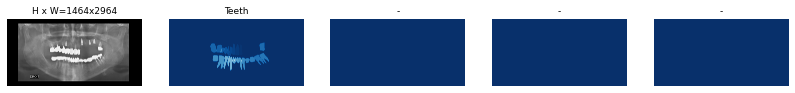

In [9]:
# Load image samples
display_image_samples(dataset_train)

In [10]:
# Load Configuration
config = CustomConfig(class_number)
config.display()
model = load_training_model(config)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
ETF_C                          2
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE          

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [11]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20221025T2059/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

In [12]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/maskrcnn_colab/logs/object20221025T2059/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


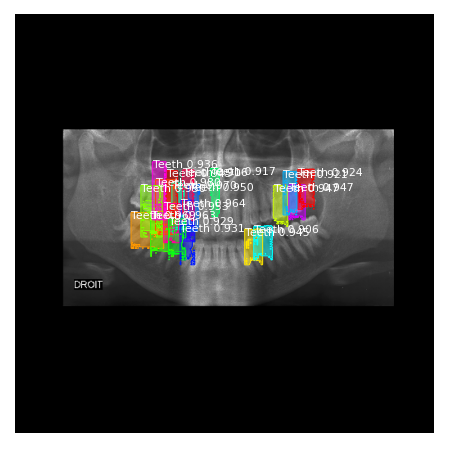

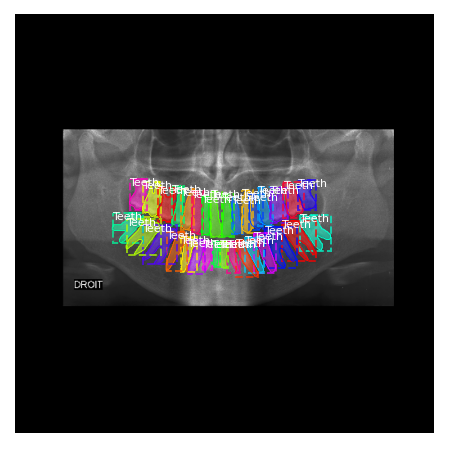

In [13]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)